# Multiple Linear Regression and Assumptions of Linear Regression

# Firstly, let us look at the assumptions of Linear Regression:
## 1. The independent variables should not be correlated.
## 2. Linear Regression means that the dependent variable should be linearly related with the coefficients.
## 3. The error terms has a constant variance i.e. they are homoscedastic in nature.
## 4. There should not be any auto-correlation between the error terms. (One value of the error term should not predict the next value of the error term)
## 5. The errors are assumed to be normally distributed.

The problem that we are dealing with today is related to advertising. We have the amount of money spent on TV, Radio and Newspaper advertising by a firm. We are trying to predict the Sales of the firm from the previously mentioned information. 
Through this problem we will test the assumptions of Linear Regression as well.

In [3]:
#importing the libraries
import numpy as np #numerical python
import pandas as pd #python dataframe
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as sc # scientific python
import statsmodels.api as sm

In [4]:
df = pd.read_csv("Advertising.csv")
df.head()

,S.No,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


Let us now go ahead and check a few measures of Descriptive Statistics.

In [5]:
df.describe()

,S.No,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


# Test of Assumption 1 of Linear Regression: The independent variables should not be correlated.

In [6]:
df[['TV','Radio','Newspaper']].corr()

,TV,Radio,Newspaper
TV,1.000000,0.054809,0.056648
Radio,0.054809,1.000000,0.354104
Newspaper,0.056648,0.354104,1.000000


From the above correlation matrix, we can see that the correlation between the independent variables are are almost zero. Thus, we can infer that the independent variables are not linearly related. Assumption 1 of Linear Regression holds true for this particular case study.

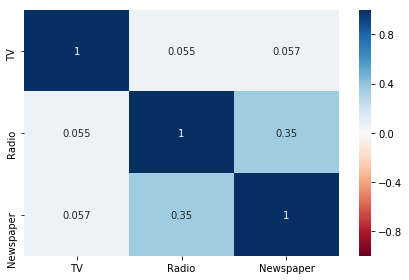

In [9]:
#plt.figure(figsize=(12,4)) #With this code snippet, we can change the size of the heatmap thus created.

sns.heatmap(df[['TV','Radio','Newspaper']].corr(),annot=True,vmax=1,vmin=-1,cmap='RdBu')

plt.tight_layout()


# Test of Assumption 2 of Linear Regression: Linear Regression means that the dependent variable should be linearly related with the coefficients.

We do not need to explicitly test this assumption as the Python code for Linear Regression makes sure that this particular assumption is met. 

Now let us go ahead and perform the Linear Regression algorithm and try to predict the Sales.

First let us split the dataset into the dependent and independent variables and assign the variables Y and X respectively.

In [10]:
X=df[['TV','Radio','Newspaper']]
Y=df['Sales']

In [11]:
# This adds the constant term beta0 to the Simple Linear Regression.

X_1=sm.add_constant(X)

C:\Users\gurubagi\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2223: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [12]:
model = sm.OLS(Y,X_1).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Sun, 16 Feb 2020   Prob (F-statistic):           1.58e-96
Time:                        06:37:53   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
Radio          0.1885      0.009     21.893      0.000       0.172       0.206
Newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
ypred = model.predict(X_1)
print(ypred)

0      20.523974
1      12.337855
2      12.307671
3      17.597830
4      13.188672
5      12.478348
6      11.729760
7      12.122953
8       3.727341
9      12.550849
10      7.032299
11     17.285129
12     10.577121
13      8.826300
14     18.434366
15     20.819300
16     12.823657
17     23.224957
18      9.951682
19     14.166073
20     18.100767
21     14.740538
22      6.489150
23     16.545933
24      8.146519
25     15.610039
26     14.989514
27     17.051673
28     19.410538
29      9.144024
         ...    
170     7.394980
171    14.358274
172     7.607692
173    11.970939
174    13.744357
175    24.786870
176    19.979373
177    12.162046
178    16.010997
179    12.384555
180    10.587200
181    13.928099
182     6.554670
183    24.133100
184    18.538521
185    20.803011
186     9.691373
187    17.076442
188    18.644306
189     6.051624
190    12.489159
191     8.424019
192     4.466230
193    18.486958
194    16.495300
195     5.370342
196     8.165312
197    12.7859

In [14]:
df['pred'] = ypred

In [15]:
df['error'] = Y - ypred
df.head()

,S.No,TV,Radio,Newspaper,Sales,pred,error
0,1,230.1,37.8,69.2,22.1,20.523974,1.576026
1,2,44.5,39.3,45.1,10.4,12.337855,-1.937855
2,3,17.2,45.9,69.3,9.3,12.307671,-3.007671
3,4,151.5,41.3,58.5,18.5,17.597830,0.902170
4,5,180.8,10.8,58.4,12.9,13.188672,-0.288672


# Test of Assumption 3 of Linear Regression: The error terms has a constant variance i.e. they are homoscedastic in nature.

We will plot the Residuals (or errors) against the predictor variable values.

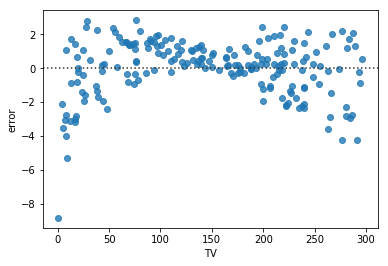

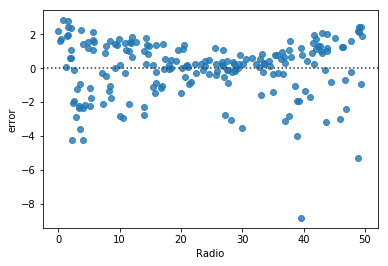

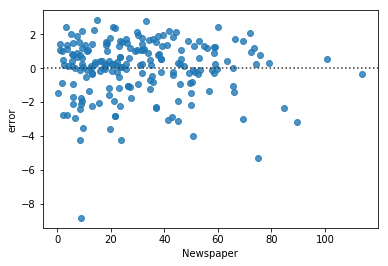

In [16]:
for names in range(0,len(X.columns)):
    sns.residplot(X.iloc[:,names],df['error'])
    plt.show()

Here, we see that the Residual Plots does not necessarily follow any particular pattern. Some kind of pattern can be noticed in the residual plot.

# Test of Assumption 4: There should not be any auto-correlation between the error terms. (One value of the error term should not predict the next value of the error term)

Here, we notice that the p-value is very less which is in line with our algorithm. The variables thus used to build our model are significant. The p-value for the variable Newspaper is greater than $\alpha$ (0.05) but we will not be dropping that variable as intuitively that seems like an important variable.

In [17]:
print('The variation in the dependent variable which is explained by the independent variables is','\n',
      model.rsquared*100,'%')

The variation in the dependent variable which is explained by the independent variables is 
 89.72106381789521 %


If the Durbin-Watson test statistic is very close to 2, we can go ahead and say that there is no autocorrelation. We will not be going into the depth of calculation of the Durbin-Watson test statistic.

The following is the Durbin-Watson test statistic:

# $\frac{\sum_{t=2}^{T}(e_t - e_{t-1})^{2}}
 {\sum_{t=1}^{T}(e_t)^{2}}$



Here, we see that the Durbin-Watson test statistic is close to 2 and thus we can say that this particular assumption of Linear Regression is also verified.

Let us try to find the Durbin-Watson test statstic from the errors that we have calculated before while building the model using the SkLearn library.

In [18]:
import statsmodels

statsmodels.stats.stattools.durbin_watson(df['error'], axis=0)

2.083648405294407

We see that both the values are same and thus we accept the validity of this particular assumption.

Since, we have predicted the values using the SkLearn library, we are not predicting the values using the statsmodels library overhere.

# Test of Assumption 5 of Linear Regression: The errors are assumed to be normally distributed.

In [16]:
df['error']

0      1.576026
1     -1.937855
2     -3.007671
3      0.902170
4     -0.288672
         ...   
195    2.229658
196    1.534688
197    0.014079
198    1.732679
199   -1.773196
Name: error, Length: 200, dtype: float64

Let us check the Shapiro test of normality to check whether the errors are normally distributed.

In [17]:
from scipy.stats import shapiro

In [18]:
shapiro(np.abs(df['error']))

(0.8357536792755127, 9.197276187172809e-14)

Since the p-value is less than $\alpha$ (0.05), we can say that the errors are not normally distributed and this particular assumption does not hold true.

In [19]:
res = model.resid

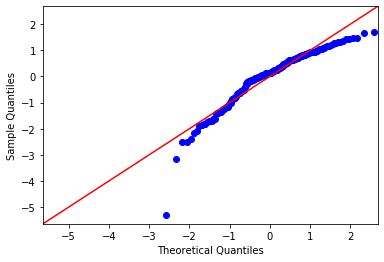

In [20]:
fig = sm.qqplot(res,fit=True,line='45')
plt.show()

We checked the same thing using the QQ plot and we can say that the Residuals (or errors) are indeed not nomrally distributed.

While working with data, in the practical scenarios the data might not follow all the assumptions of Linear Regression.